In [1]:
import time
import requests
from scrapy.http import TextResponse
import pandas as pd
from selenium import webdriver
import matplotlib.pyplot as plt

In [2]:
url = "http://rates.am/"

In [3]:
browser=webdriver.Chrome()

In [4]:
browser.get(url)

In [5]:
dates = browser.find_element_by_class_name("date-picker")

In [6]:
dates.click()

In [7]:
jul =  browser.find_element_by_class_name("calTD")

In [8]:
jul.click()

In [9]:
hour =  browser.find_element_by_id("ctl00_Content_RB_dtpick1_dpHours")

In [10]:
hour.find_element_by_xpath("//select[@id='ctl00_Content_RB_dtpick1_dpHours']/option[@value ='09:45']").click()

In [11]:
show =  browser.find_element_by_class_name("dinbtn_r")

In [12]:
show.click()

In [13]:
page = browser.page_source

In [14]:
response = TextResponse(url=url,body = page,encoding = "utf-8")

In [15]:
table = pd.read_html(page,attrs = {'id': 'rb'})

In [16]:
table[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,Բանկ,Բանկ,Մասնաճյուղեր,Ամսաթիվ,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,NaN,NaN
1,NaN,Բանկ,Բանկ,Մասնաճյուղեր,Ամսաթիվ,Առք,Վաճ.,Առք,Վաճ.,Առք,Վաճ.,Առք,Վաճ.,NaN,NaN
2,1.,ՀԱՅԲԻԶՆԵՍԲԱՆԿ,NaN,55,"01 Հլս, 09:46",475,479,537,545,7.47,7.72,600,612,NaN,NaN
3,2.,Կոնվերս Բանկ,NaN,36,"01 Հլս, 09:46",475.50,479,537,544,7.52,7.69,601,610,NaN,NaN
4,3.,Ամերիաբանկ,NaN,18,"01 Հլս, 09:46",475.50,479,537,545,7.48,7.68,601,611,NaN,NaN
5,4.,Արցախբանկ,NaN,24,"01 Հլս, 09:46",475.50,479,539,546.50,7.48,7.65,601,610,NaN,NaN
6,5.,Էյչ-Էս-Բի-Սի Բանկ,NaN,9,"01 Հլս, 09:46",475.50,478.50,538,545,7.48,7.66,602,610,NaN,NaN
7,6.,Յունիբանկ,NaN,48,"01 Հլս, 09:46",475,479,535,545,7.45,7.75,597,611,NaN,NaN
8,7.,ՎՏԲ-Հայաստան Բանկ,NaN,69,"01 Հլս, 09:46",475.50,478,537.50,542.50,7.51,7.60,601,612,NaN,NaN
9,8.,Էվոկաբանկ,NaN,12,"01 Հլս, 09:46",475.50,478.50,536,542,7.52,7.62,600,610,NaN,NaN


In [17]:
def rates_scraper(url):
    page = browser.page_source
    response = TextResponse(url=url,body = page,encoding = "utf-8")
    table = pd.read_html(url,attrs = {'id': 'rb'})
    return table

In [18]:
all_urls = ["http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/0{}/09-45".format(i) for i in range(1,10)]

In [19]:
to_14_urls=  ["http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/1{}/09-45".format(i) for i in range(0,5)]

In [20]:
all_urls.extend(to_14_urls)

In [21]:
all_urls

['http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/01/09-45',
 'http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/02/09-45',
 'http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/03/09-45',
 'http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/04/09-45',
 'http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/05/09-45',
 'http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/06/09-45',
 'http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/07/09-45',
 'http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/08/09-45',
 'http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/09/09-45',
 'http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/10/09-45',
 'http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/11/09-45',
 'http://rates.am/en/armenian-dram-exchange-rates/banks/non-cash/2019/07/12/

In [22]:
all_rates = []
i = 0
while i in range(len(all_urls)) :
    all_rates.extend(rates_scraper(all_urls[i]))
    i = i +1
    time.sleep(2)

In [23]:
all_rates[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,Bank,Bank,Branches,Date,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,NaN,NaN
1,NaN,Bank,Bank,Branches,Date,Buy,Sell,Buy,Sell,Buy,Sell,Buy,Sell,NaN,NaN
2,1.,ՀԱՅԲԻԶՆԵՍԲԱՆԿ,NaN,55,"02 Jul, 09:45",475,478.50,534,542,7.47,7.72,597,609,NaN,NaN
3,2.,Կոնվերս Բանկ,NaN,36,"02 Jul, 09:45",475,478.50,534,542,7.52,7.68,598,607,NaN,NaN
4,3.,Ամերիաբանկ,NaN,18,"02 Jul, 09:45",475,478.50,534.50,542.50,7.47,7.67,598,608,NaN,NaN
5,4.,Արցախբանկ,NaN,24,"02 Jul, 09:45",475.50,479,535.50,543,7.46,7.68,599,612,NaN,NaN
6,5.,Էյչ-Էս-Բի-Սի Բանկ,NaN,9,"02 Jul, 09:45",475.50,478.50,535,542,7.49,7.67,599,607,NaN,NaN
7,6.,Յունիբանկ,NaN,48,"02 Jul, 09:45",475,479,533,543,7.45,7.75,595,610,NaN,NaN
8,7.,ՎՏԲ-Հայաստան Բանկ,NaN,69,"02 Jul, 09:45",475,478,534.50,540,7.52,7.61,597,609,NaN,NaN
9,8.,Էվոկաբանկ,NaN,12,"02 Jul, 09:45",475.50,478.50,535,541,7.52,7.62,597,607,NaN,NaN


# 3-1 The average USD rate for this duration is 475.25 (buy)
# 478.45 (sell)

In [24]:
all_ratings = pd.concat((all_rates[i]).iloc[2:19,:] for i in range(len(all_urls)))

In [25]:
mean_all_buys = all_ratings.iloc[:,5].apply(pd.to_numeric, errors = 'coerce').mean()

In [26]:
mean_all_sells = all_ratings.iloc[:,6].apply(pd.to_numeric, errors = 'coerce').mean()

In [27]:
mean_all_buys 

475.25735294117646

In [28]:
mean_all_sells

478.4548319327731

# The average daily USD rate and plot (July 1-14)

In [29]:
daily_buy_mean=[]
for i in range(len(all_rates)): 
    daily_buy_mean.append(all_rates[i].iloc[:,5][2:19].apply(pd.to_numeric, errors = 'coerce').mean())

In [30]:
daily_buy_mean

[475.36764705882354,
 475.20588235294116,
 475.2647058823529,
 475.3235294117647,
 475.3529411764706,
 475.29411764705884,
 475.29411764705884,
 475.3235294117647,
 475.2647058823529,
 475.25,
 475.1764705882353,
 475.13235294117646,
 475.1764705882353,
 475.1764705882353]

In [31]:
daily_sell_mean=[]
for i in range(len(all_rates)): 
    daily_sell_mean.append(all_rates[i].iloc[:,6][2:19].apply(pd.to_numeric, errors = 'coerce').mean())

In [32]:
len(daily_sell_mean)

14

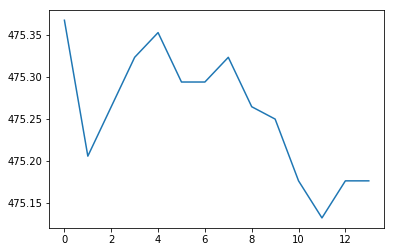

In [33]:
plt.plot(daily_buy_mean)

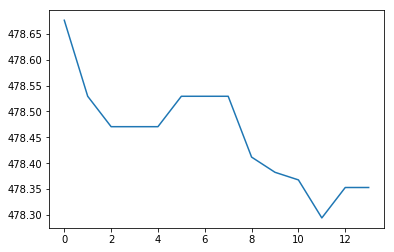

In [34]:
plt.plot(daily_sell_mean)